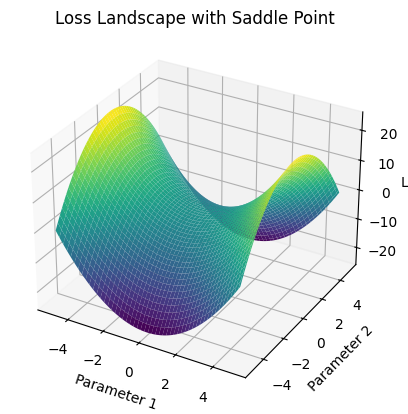

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def loss_function(x, y):
    return x**2 - y**2  # This creates a saddle point at (0,0)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = loss_function(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Loss')
plt.title('Loss Landscape with Saddle Point')
plt.show()

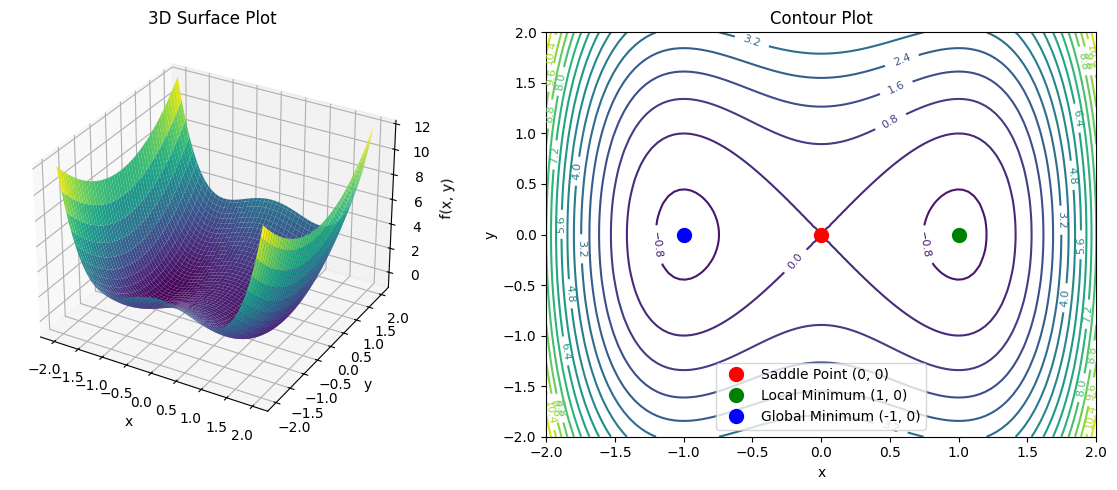

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x**4 - 2*x**2 + y**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(12, 5))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D Surface Plot')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot')

# Annotate critical points
ax2.plot(0, 0, 'ro', markersize=10, label='Saddle Point (0, 0)')
ax2.plot(1, 0, 'go', markersize=10, label='Local Minimum (1, 0)')
ax2.plot(-1, 0, 'bo', markersize=10, label='Global Minimum (-1, 0)')

ax2.legend()

plt.tight_layout()
plt.show()

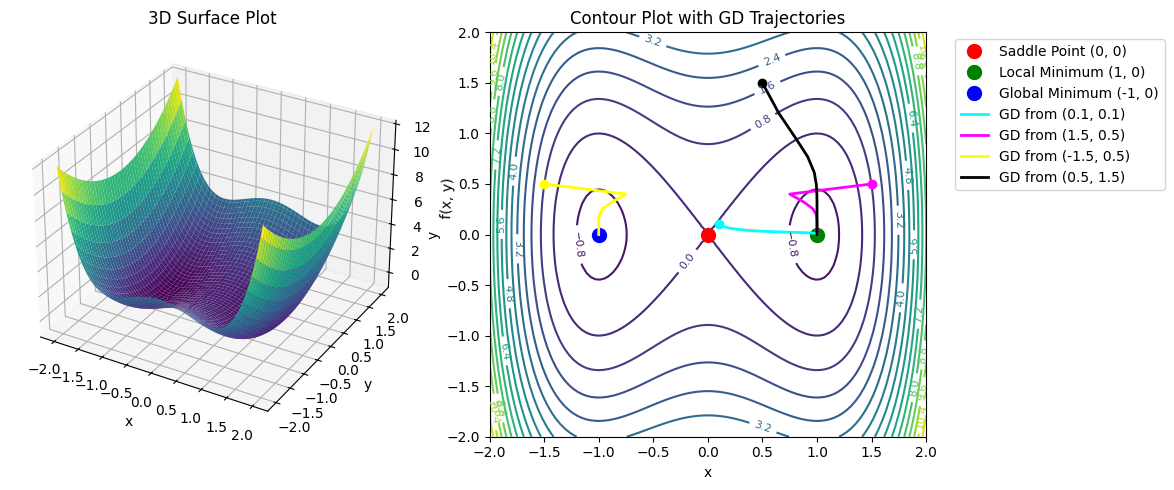

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x**4 - 2*x**2 + y**2

def gradient(x, y):
    dx = 4*x**3 - 4*x
    dy = 2*y
    return np.array([dx, dy])

def gradient_descent(start, learning_rate, num_iterations):
    path = [start]
    point = np.array(start)
    for _ in range(num_iterations):
        grad = gradient(point[0], point[1])
        point = point - learning_rate * grad
        path.append(point)
    return np.array(path)

#implement stochastic gradient descent
def stochastic_gradient_descent(start, learning_rate, num_iterations):
    

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(12, 5))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D Surface Plot')

# Contour plot with GD trajectories
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot with GD Trajectories')

# Annotate critical points
ax2.plot(0, 0, 'ro', markersize=10, label='Saddle Point (0, 0)')
ax2.plot(1, 0, 'go', markersize=10, label='Local Minimum (1, 0)')
ax2.plot(-1, 0, 'bo', markersize=10, label='Global Minimum (-1, 0)')

# Add GD trajectories
starts = [(0.1, 0.1), (1.5, 0.5), (-1.5, 0.5), (0.5, 1.5)]
colors = ['cyan', 'magenta', 'yellow', 'black']
for start, color in zip(starts, colors):
    path = gradient_descent(start, learning_rate=0.1, num_iterations=50)
    ax2.plot(path[:, 0], path[:, 1], color=color, linewidth=2, 
             label=f'GD from {start}')
    ax2.plot(path[0, 0], path[0, 1], 'o', color=color)  # Start point

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

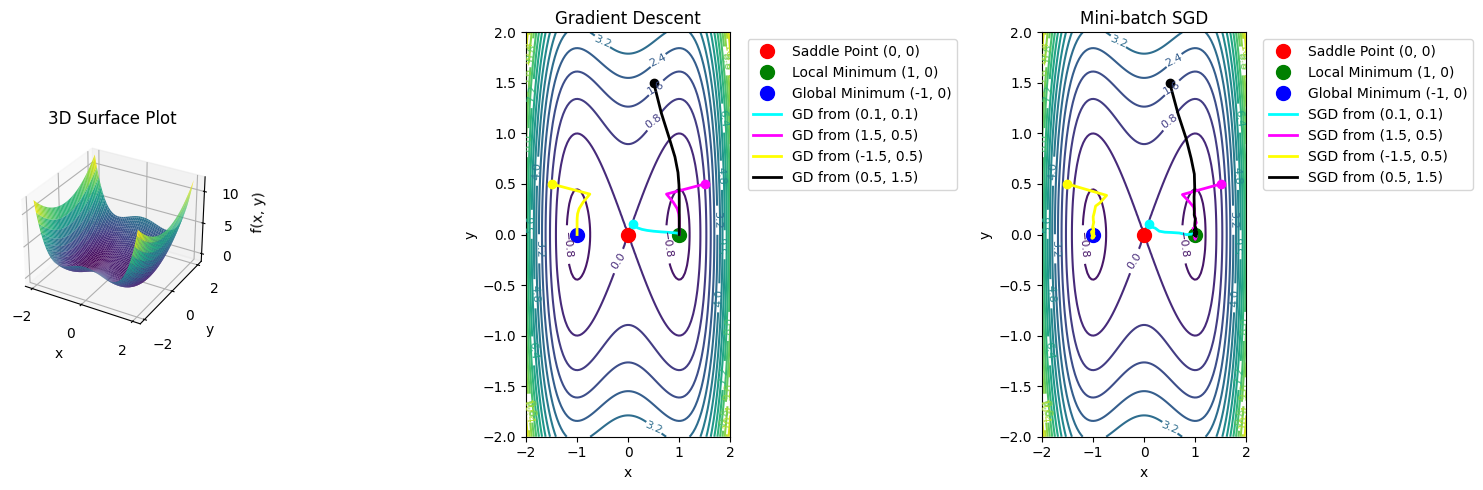

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x**4 - 2*x**2 + y**2

def gradient(x, y):
    dx = 4*x**3 - 4*x
    dy = 2*y
    return np.array([dx, dy])

def gradient_descent(start, learning_rate, num_iterations):
    path = [start]
    point = np.array(start)
    for _ in range(num_iterations):
        grad = gradient(point[0], point[1])
        point = point - learning_rate * grad
        path.append(point)
    return np.array(path)

def mini_batch_sgd(start, learning_rate, num_iterations, batch_size=10):
    path = [start]
    point = np.array(start)
    for _ in range(num_iterations):
        # Simulate mini-batch by adding noise to the true gradient
        batch_grad = gradient(point[0], point[1])
        noise = np.random.normal(0, 0.1, size=2)  # Adjust noise level as needed
        batch_grad += noise
        point = point - learning_rate * batch_grad
        path.append(point)
    return np.array(path)

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(15, 5))

# 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D Surface Plot')

# Contour plot with GD trajectories
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Gradient Descent')

# Contour plot with SGD trajectories
ax3 = fig.add_subplot(133)
contour = ax3.contour(X, Y, Z, levels=20)
ax3.clabel(contour, inline=True, fontsize=8)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Mini-batch SGD')

# Annotate critical points
for ax in [ax2, ax3]:
    ax.plot(0, 0, 'ro', markersize=10, label='Saddle Point (0, 0)')
    ax.plot(1, 0, 'go', markersize=10, label='Local Minimum (1, 0)')
    ax.plot(-1, 0, 'bo', markersize=10, label='Global Minimum (-1, 0)')

# Add GD and SGD trajectories
starts = [(0.1, 0.1), (1.5, 0.5), (-1.5, 0.5), (0.5, 1.5)]
colors = ['cyan', 'magenta', 'yellow', 'black']

for start, color in zip(starts, colors):
    # Gradient Descent
    gd_path = gradient_descent(start, learning_rate=0.1, num_iterations=50)
    ax2.plot(gd_path[:, 0], gd_path[:, 1], color=color, linewidth=2, 
             label=f'GD from {start}')
    ax2.plot(gd_path[0, 0], gd_path[0, 1], 'o', color=color)  # Start point
    
    # Mini-batch SGD
    sgd_path = mini_batch_sgd(start, learning_rate=0.1, num_iterations=50)
    ax3.plot(sgd_path[:, 0], sgd_path[:, 1], color=color, linewidth=2, 
             label=f'SGD from {start}')
    ax3.plot(sgd_path[0, 0], sgd_path[0, 1], 'o', color=color)  # Start point

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()